In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

''' inputs '''
T=3.0 # horizon length 
l1=1; l2=2; l=l1+l2 # average length of the vehicles in the j-th population [m]
rho1_jam=1.0; rho2_jam=0.5 # jam density [vehicles/m]
u1_max=1.0; u2_max=0.5 # free flow speed 
L=2 # road length [m]
### l1*rho1_jam = l2*rho2_jam = L
CFL=0.75    # CFL<1
EPS=0.45    # EPS<0.5

def r_id(j,n): ## Done
    return (j-1)*(Nt+1)+n

def u_id(j,n): ## Done
    return (Nt+1)*(2*Nx)+(j-1)*Nt+n

def V_id(j,n): ## Done
    return (2*Nt+1)*(2*Nx)+(j-1)*(Nt+1)+n

def solution(sol,rho1,u1,V1,Q1,s1,rho2,u2,V2,Q2,s2,s): 
    for j in range(1,Nx+1):
        for n in range(0,Nt):
            rho1[j,n]=sol[r_id(j,n)]
#             s1[j,n]=(rho1[j,n]/rho1_jam)*(l1/l)
            s1[j,n]=(rho1[j,n]*l1)
            u1[j,n]=sol[u_id(j,n)]
            V1[j,n]=sol[V_id(j,n)]
            Q1[j,n]=rho1[j,n]*u1[j,n]
        rho1[j,Nt]=sol[r_id(j,Nt)]
#         s1[j,Nt]=(rho1[j,Nt]/rho1_jam)*(l1/l)
        s1[j,Nt]=(rho1[j,Nt]*l1)
        V1[j,Nt]=sol[V_id(j,Nt)]
    for j in range(Nx+1,2*Nx+1):
        for n in range(0,Nt):
            rho2[j-Nx,n]=sol[r_id(j,n)]
#             s2[j-Nx,n]=(rho2[j-Nx,n]/rho2_jam)*(l2/l)
            s2[j-Nx,n]=(rho2[j-Nx,n]*l2)
            u2[j-Nx,n]=sol[u_id(j,n)]
            V2[j-Nx,n]=sol[V_id(j,n)]
            Q2[j-Nx,n]=rho2[j-Nx,n]*u2[j-Nx,n]
        rho2[j-Nx,Nt]=sol[r_id(j,Nt)]
#         s2[j-Nx,Nt]=(rho2[j-Nx,Nt]/rho2_jam)*(l2/l)
        s2[j-Nx,Nt]=(rho2[j-Nx,Nt]*l2)
        V2[j-Nx,Nt]=sol[V_id(j,Nt)]
    for n in range(0,Nt): # periodic boundary conditions
        rho1[0,n]=rho1[Nx,n]
#         s1[0,n]=(rho1[0,n]/rho1_jam)*(l1/l)
        s1[0,n]=(rho1[0,n]*l1)
        V1[0,n]=V1[Nx,n]
        u1[0,n]=u1[Nx,n]
        Q1[0,n]=Q1[Nx,n]
        rho2[0,n]=rho2[Nx,n]
#         s2[0,n]=(rho2[0,n]/rho2_jam)*(l2/l)
        s2[0,n]=(rho2[0,n]*l2)
        V2[0,n]=V2[Nx,n]
        u2[0,n]=u2[Nx,n]
        Q2[0,n]=Q2[Nx,n]
    rho1[0,Nt]=rho1[Nx,Nt]
#     s1[0,Nt]=(rho1[0,Nt]/rho1_jam)*(l1/l)
    s1[0,Nt]=(rho1[0,Nt]*l1)
    V1[0,Nt]=V1[Nx,Nt]
    rho2[0,Nt]=rho2[Nx,Nt]
#     s2[0,Nt]=(rho2[0,Nt]/rho2_jam)*(l2/l)
    s2[0,Nt]=(rho2[0,Nt]*l2)
    V2[0,Nt]=V2[Nx,Nt]
    for j in range(0,Nx+1):
        for n in range(0,Nt+1):
            s[j,n]=s1[j,n]+s2[j,n]
    
    return 0

def convergence(guess,sol):
    def solution2(sol,rho1,u1,rho2,u2):
        for j in range(1,Nx+1): # 1,Nx+1
            for n in range(0,Nt):
                rho1[j,n]=sol[r_id(j,n)]
                u1[j,n]=sol[u_id(j,n)]
            rho1[j,Nt]=sol[r_id(j,Nt)]
        for j in range(Nx+1,2*Nx+1): # Nx+1,2*Nx+1
            for n in range(0,Nt):
                rho2[j-Nx,n]=sol[r_id(j,n)]
                u2[j-Nx,n]=sol[u_id(j,n)]
            rho2[j-Nx,Nt]=sol[r_id(j,Nt)]
        return 0
    rho1=np.zeros((Nx+1,Nt+1))
    u1=np.zeros((Nx+1,Nt))
    rho2=np.zeros((Nx+1,Nt+1))
    u2=np.zeros((Nx+1,Nt))
    solution2(guess,rho1,u1,rho2,u2)
    rho1_mfg=np.zeros((Nx+1,Nt+1))
    u1_mfg=np.zeros((Nx+1,Nt))
    rho2_mfg=np.zeros((Nx+1,Nt+1))
    u2_mfg=np.zeros((Nx+1,Nt))
    solution2(sol,rho1_mfg,u1_mfg,rho2_mfg,u2_mfg)
#     error=np.linalg.norm(rho1_mfg-rho1,ord=1)/np.linalg.norm(rho1_mfg,ord=1)\
#     +np.linalg.norm(rho2_mfg-rho2,ord=1)/np.linalg.norm(rho2_mfg,ord=1)\
#     +np.linalg.norm(u1_mfg-u1,ord=1)/np.linalg.norm(u1_mfg,ord=1)\
#     +np.linalg.norm(u2_mfg-u2,ord=1)/np.linalg.norm(u2_mfg,ord=1)
    error=np.linalg.norm(rho1_mfg-rho1,ord=1)/((Nx+1)*(Nt+1))+np.linalg.norm(rho2_mfg-rho2,ord=1)/((Nx+1)*(Nt+1))\
    +np.linalg.norm(u1_mfg-u1,ord=1)/((Nx+1)*Nt)+np.linalg.norm(u2_mfg-u2,ord=1)/((Nx+1)*Nt)
    return error


def plotting(t,x,y,rho1,u1,V1,Q1,rho2,u2,V2,Q2):
    tt, xx = np.meshgrid(t, x)
    fig = plt.figure(figsize=(6, 5), dpi=100)
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, tt, rho1, cmap=cm.viridis)
#     ax.plot_surface(xx, tt, rho2, cmap=cm.viridis)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$t$')
    ax.set_zlabel('Car\'s density')
    ax.invert_xaxis()
    fig = plt.figure(figsize=(6, 5), dpi=100)
    ax = fig.gca(projection='3d')
    ax.plot_surface(xx, tt, rho2, cmap=cm.viridis)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$t$')
    ax.set_zlabel('Truck\'s density')
    ax.invert_xaxis()

    plt.figure(figsize=(15, 3))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.4)
    plt.subplot(1,4,1)
    plt.plot(y,rho1[:,0],'b',label='car\'s density')
    plt.plot(y,rho2[:,0],'b-.',label='truck\'s density')
    plt.plot(y,u1[:,0],'g',label='car\'s speed')
    plt.plot(y,u2[:,0],'g-.',label='truck\'s speed')
    plt.plot(x,V1[:,0],'r',label='car\'s Optimal cost')
    plt.plot(x,V2[:,0],'r-.',label='truck\'s Optimal cost')
#     plt.grid()
    plt.title("t=0.0")
    plt.xlabel('x')
    
    plt.subplot(1,4,2)
    plt.plot(y,rho1[:,int(Nt/3)],'b',label='car\'s density')
    plt.plot(y,rho2[:,int(Nt/3)],'b-.',label='truck\'s density')
    plt.plot(y,u1[:,int(Nt/3)],'g',label='car\'s speed')
    plt.plot(y,u2[:,int(Nt/3)],'g-.',label='truck\'s speed')
    plt.plot(x,V1[:,int(Nt/3)],'r',label='car\'s Optimal cost')
    plt.plot(x,V2[:,int(Nt/3)],'r-.',label='truck\'s Optimal cost')
#     plt.grid()
    plt.title("t={t}".format(t=round(t[int(Nt/3)],3)))
    plt.xlabel('x')
    
    plt.subplot(1,4,3)
    plt.plot(y,rho1[:,int(Nt/2)],'b',label='car\'s density')
    plt.plot(y,rho2[:,int(Nt/2)],'b-.',label='truck\'s density')
    plt.plot(y,u1[:,int(Nt/2)],'g',label='car\'s speed')
    plt.plot(y,u2[:,int(Nt/2)],'g-.',label='truck\'s speed')
    plt.plot(x,V1[:,int(Nt/2)],'r',label='car\'s Optimal cost')
    plt.plot(x,V2[:,int(Nt/2)],'r-.',label='truck\'s Optimal cost')
#     plt.grid()
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("t={t}".format(t=round(t[int(Nt/2)],3)))
    plt.xlabel('x')
    
    plt.subplot(1,4,4)
    plt.plot(y,rho1[:,Nt-1],'b',label='car\'s density')
    plt.plot(y,rho2[:,Nt-1],'b-.',label='truck\'s density')
    plt.plot(y,u1[:,Nt-1],'g',label='car\'s speed')
    plt.plot(y,u2[:,Nt-1],'g-.',label='truck\'s speed')
    plt.plot(x,V1[:,Nt-1],'r',label='car\'s Optimal cost')
    plt.plot(x,V2[:,Nt-1],'r-.',label='truck\'s Optimal cost')
#     plt.grid()
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title("t={t}".format(t=round(t[Nt-1],3)))
    plt.xlabel('x')
#     plt.savefig('LWR2_Case1_density_speed_cost.png')
    
    
   # plt.figure()
   # plt.plot(Nx_list,Error_list)
   # plt.xlabel('Spatial grid size')
   # plt.ylabel('error')
#     plt.grid()
   # plt.title("convergence of solution algorithm")
#     plt.savefig('LWR2_TC_covergence_error.png')
    



    return 0

def solve_grid(new_Nx,new_Nt,mu,guess,sol,Nx_list,Error_list):
    Nx=new_Nx; Nt=new_Nt
    dx=L/Nx # spatial step size
    if mu==0.0:
        dt=min(T/Nt,CFL*dx/max(u1_max,u2_max)) # temporal step size
    else:
        dt=min(T/Nt,CFL*dx/max(u1_max,u2_max),EPS*(dx**2)/mu) 
    x=np.linspace(0,L,Nx+1)
    t=np.arange(0,T,dt)
    Nt=int(len(t))
    print('Nx={Nx}, Nt={Nt}'.format(Nx=Nx,Nt=Nt))
    print('dx={dx}, dt={dt}'.format(dx=round(dx,3),dt=round(dt,3)))
    
    e=convergence(guess,sol)
    Error_list.append(e)
    Nx_list.append(Nx)
    
    return 0

Nx=240, Nt=960
dx=0.008333333333333333, dt=0.003125
(240, 961)
(240, 960)
240
961


/tmp/ipykernel_4234/3140544660.py:111: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_4234/3140544660.py:119: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


0

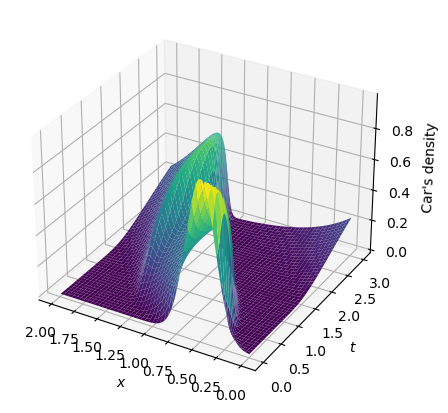

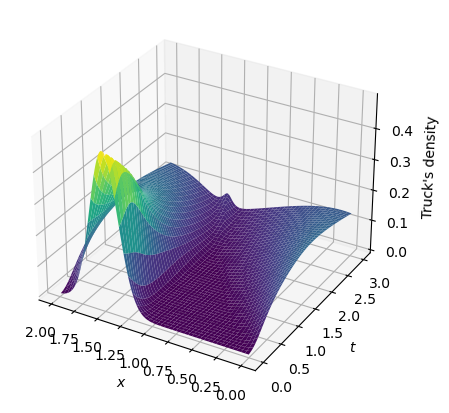

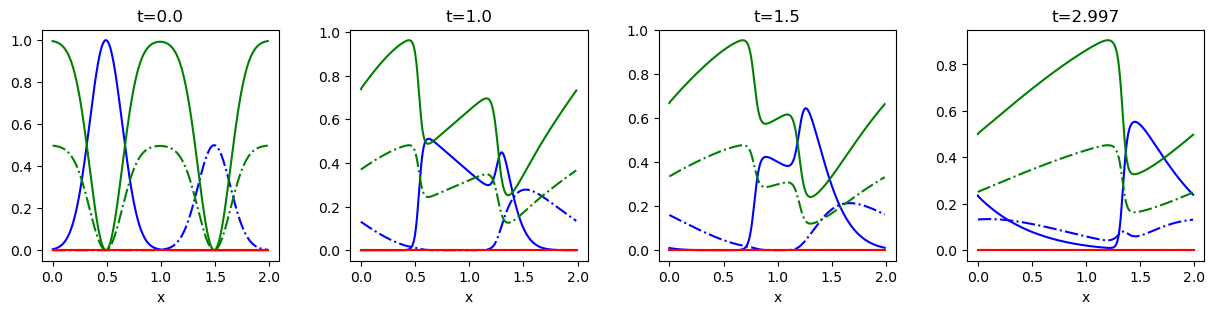

In [3]:
Error_list=[]
Nx_list=[]

""" ************************************************* """
npzfile = np.load('./data_solutions_grid4.npz')
Nx = npzfile['Nx']
Nt = npzfile['Nt']
dx = npzfile['dx']
dt = npzfile['dt']
print('Nx={Nx}, Nt={Nt}'.format(Nx=Nx,Nt=Nt))
print('dx={dx}, dt={dt}'.format(dx=dx,dt=dt))
mu=npzfile['mu']

""" Solutions """
rho1_mfg=npzfile['s_rho1']
print(rho1_mfg.shape)
u1_mfg=npzfile['s_u1']
print(u1_mfg.shape)
V1_mfg=npzfile['s_V1']
Q1_mfg=npzfile['s_Q1']
rho2_mfg=npzfile['s_rho2']
u2_mfg=npzfile['s_u2']
V2_mfg=npzfile['s_V2']
Q2_mfg=npzfile['s_Q2']
x_mfg=npzfile['x_points'][:-1]
print(len(x_mfg))
t_mfg=npzfile['t_points']
print(len(t_mfg))
y_mfg=np.zeros(len(x_mfg))
for i in range(1,len(x_mfg)):
    y_mfg[i]=(x_mfg[i-1]+x_mfg[i])/2
""" Plots """
plotting(t_mfg,x_mfg,y_mfg,rho1_mfg,u1_mfg,V1_mfg,Q1_mfg,rho2_mfg,u2_mfg,V2_mfg,Q2_mfg)

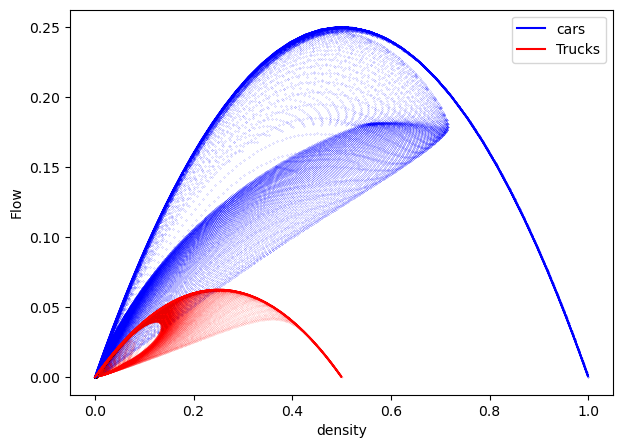

In [4]:
plt.figure(figsize=(7, 5))
for n in range(Nt):
    if n%4==0:
        plt.scatter(rho1_mfg[:,n],Q1_mfg[:,n],color = 'b',s=0.01)
        plt.scatter(rho2_mfg[:,n],Q2_mfg[:,n],color = 'r',s=0.001)
plt.plot(rho1_mfg[:,0],Q1_mfg[:,0],'b',label='cars')
plt.plot(rho2_mfg[:,0],Q2_mfg[:,0],'r',label='Trucks')
plt.xlabel('density')
plt.ylabel('Flow')
# plt.grid()
plt.legend()
plt.savefig('LWR2_Case1_Fundamental_diagram.png')